In [27]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [28]:
print(tf.__version__)

2.18.0


In [30]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)

model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
def getSubmodel(layer):
    return tf.keras.Model(
        model.input,
        model.get_layer(layer).output
    )

In [32]:
def createRandomImage(x=100, y=100):
    return tf.random.uniform((x, y, 3), minval=-0.5, maxval=0.5)

In [33]:
def pltImage(image, title='image'):
    image = image - tf.math.reduce_min(image)
    image = image / tf.math.reduce_max(image)
    plt.imshow(image)
    plt.show()


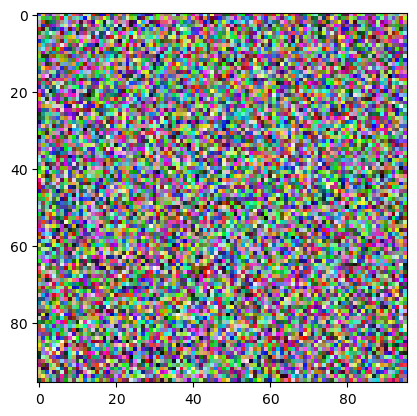

In [35]:
image = createRandomImage(96, 96)
pltImage(image)

In [43]:
def visualizeFilter(layer, it = 50, index = None, image = None):
    submodel = getSubmodel(layer)
    num = submodel.output.shape[-1]
    
    if index is None:
        index = random.randint(0, num - 1)
    assert num > index , 'index too large'
    
    if image is None:
        image = createRandomImage(96, 96)
    
    for i in range(0, it):
        with tf.GradientTape() as tape:
            tape.watch(image)
            out = submodel(tf.expand_dims(image, axis = 0))[:,:,:,index]
            loss = tf.math.reduce_mean(out)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * 10
        
        if(i % 10 == 0):
            print(str(i) + ": loss = ", loss)
        
    pltImage(image, layer)


0: loss =  tf.Tensor(0.71503425, shape=(), dtype=float32)
10: loss =  tf.Tensor(1.2905717, shape=(), dtype=float32)
20: loss =  tf.Tensor(2.0563576, shape=(), dtype=float32)
30: loss =  tf.Tensor(2.9032335, shape=(), dtype=float32)
40: loss =  tf.Tensor(3.7967486, shape=(), dtype=float32)
50: loss =  tf.Tensor(4.7243576, shape=(), dtype=float32)
60: loss =  tf.Tensor(5.676338, shape=(), dtype=float32)
70: loss =  tf.Tensor(6.6497912, shape=(), dtype=float32)
80: loss =  tf.Tensor(7.6374836, shape=(), dtype=float32)
90: loss =  tf.Tensor(8.637612, shape=(), dtype=float32)


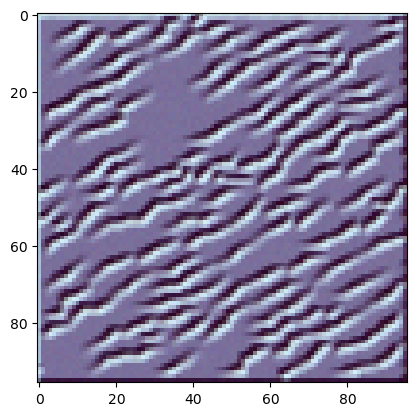

In [46]:
layer = 'block1_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualizeFilter(layer, 100)